In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/amp/all_data.csv') # reading the training dataset for acp

In [5]:
df.head(2)#comment

,PDBs_code,SequenceID,label
0,AP02484,GMASKAGSVLGKITKIALGAL,1
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1


In [6]:
#chain go up to 183

In [7]:
df_split = df['SequenceID'].str.split(pat="", expand=True)

In [8]:
df_split.tail()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
4037,,S,S,G,N,V,N,E,V,P,...,None,None,None,None,None,None,None,None,None,None
4038,,E,S,C,N,F,A,V,F,W,...,None,None,None,None,None,None,None,None,None,None
4039,,V,A,A,L,N,D,C,I,Y,...,None,None,None,None,None,None,None,None,None,None
4040,,P,H,T,H,T,Q,K,E,V,...,None,None,None,None,None,None,None,None,None,None
4041,,L,T,L,S,E,F,L,K,L,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df2 = df[['PDBs_code','SequenceID','label']].join(df_split) 
# putting the dataframes together

In [10]:
df2.head(2)#column 0 is blank, column 184 is blank

,PDBs_code,SequenceID,label,0,1,2,3,4,5,6,...,175,176,177,178,179,180,181,182,183,184
0,AP02484,GMASKAGSVLGKITKIALGAL,1,,G,M,A,S,K,A,...,None,None,None,None,None,None,None,None,None,None
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,,N,I,G,L,F,T,...,None,None,None,None,None,None,None,None,None,None


In [11]:
letter_2num = {
    s: i for i, s in enumerate(
        ['','A', 'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M',
         'N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
            }

In [12]:
for column in df2.columns[3:]:
    df2[column] = df2[column].replace(letter_2num)

In [13]:
df2.head(3)

,PDBs_code,SequenceID,label,0,1,2,3,4,5,6,...,175,176,177,178,179,180,181,182,183,184
0,AP02484,GMASKAGSVLGKITKIALGAL,1,0,7,13,1,19,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,0,14,9,7,12,6,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1,0,7,1,9,11,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2.to_csv('toto.csv') #df.drop(df.columns[1], axis=1) does not work/..

In [15]:
df3 = pd.read_csv('toto.csv') # saving and retrieving

In [16]:
df3.head()

,Unnamed: 0,PDBs_code,SequenceID,label,0,1,2,3,4,5,...,175,176,177,178,179,180,181,182,183,184
0,0,AP02484,GMASKAGSVLGKITKIALGAL,1,0,7,13,1,19,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,0,14,9,7,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1,0,7,1,9,11,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AP02983,FFGRLKAVFRGARQGWKEHRY,1,0,6,6,7,18,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1,0,4,6,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df4 = df3.drop(['Unnamed: 0','0', '184'], axis=1) # removing blank columns

In [18]:
df4.head(2)

,PDBs_code,SequenceID,label,1,2,3,4,5,6,7,...,174,175,176,177,178,179,180,181,182,183
0,AP02484,GMASKAGSVLGKITKIALGAL,1,7,13,1,19,11,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,14,9,7,12,6,20,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df5=df4.fillna(0)
df5.head(2)

,PDBs_code,SequenceID,label,1,2,3,4,5,6,7,...,174,175,176,177,178,179,180,181,182,183
0,AP02484,GMASKAGSVLGKITKIALGAL,1,7,13,1,19,11,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1,14,9,7,12,6,20,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
df_train, df_test =  train_test_split(df5,test_size = 0.2,random_state=30) 

In [21]:
y_train = df_train['label'].values
X_train = df_train.drop(columns=['PDBs_code','SequenceID','label']).values
y_test = df_test['label'].values
X_test = df_test.drop(columns=['PDBs_code','SequenceID','label']).values

In [22]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [23]:
X_train

array([[12., 16.,  1., ...,  0.,  0.,  0.],
       [14.,  8.,  1., ...,  0.,  0.,  0.],
       [ 9., 19., 12., ...,  0.,  0.,  0.],
       ...,
       [13.,  9., 12., ...,  0.,  0.,  0.],
       [14., 12.,  6., ...,  0.,  0.,  0.],
       [ 7.,  6., 20., ...,  0.,  0.,  0.]])

In [24]:
#import numpy as np

In [25]:
#scale the features, applying MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # YOUR CODE HERE
X_train = scaler.fit_transform(X_train) # YOUR CODE HERE
X_test = scaler.fit_transform(X_test) # YOUR CODE HERE

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
%%time
gbt_model = GradientBoostingClassifier(random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_test)

CPU times: user 2.08 s, sys: 10.7 ms, total: 2.09 s
Wall time: 2.25 s


In [28]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)
print("accuracy:", accuracy(y_test, gbt_pred))
print("precision:", precision(y_test, gbt_pred))
print("recall:", recall(y_test, gbt_pred))
print("f1 score:", f1_score(y_test, gbt_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, gbt_pred))

accuracy: 0.8071693448702101
precision: 0.8063660477453581
recall: 0.7855297157622739
f1 score: 0.7958115183246074
confusion matrix:
[[349  73]
 [ 83 304]]


In [31]:
import pickle
filename = 'xgb_amp_model2.sav'
pickle.dump(gbt_model, open(filename, 'wb'))

In [33]:
X_test

array([[0.54166667, 0.625     , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.875     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.75      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.45833333, 0.625     , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.625     , 0.54166667, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.25      , 0.08333333, ..., 0.        , 0.        ,
        0.        ]])

In [58]:
x = 'DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMGGFDDFDFDFDF'

In [59]:
data = {'PDBs_code': ['AP02484'],'SequenceID': [x], 'label': [0]}
df = pd.DataFrame(data)

In [60]:
df_split = df['SequenceID'].str.split(pat="", expand=True)

In [71]:
df_split.shape

(1, 61)

In [61]:
df2 = df[['SequenceID','label']].join(df_split)

In [62]:
df2

,SequenceID,label,0,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,60
0,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFI...,0,,D,F,G,C,A,R,G,...,D,D,F,D,F,D,F,D,F,


In [63]:
letter_2num = {
        s: i for i, s in enumerate(
        ['','A', 'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M',
         'N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
            }

In [64]:
for column in df2.columns[3:]:
            df2[column] = df2[column].replace(letter_2num) 
df2.to_csv('toto.csv') 
df3 = pd.read_csv('toto.csv')        

In [65]:
df4=df3.fillna(0)

In [66]:
df4.head()

,Unnamed: 0,SequenceID,label,0,1,2,3,4,5,6,...,51,52,53,54,55,56,57,58,59,60
0,0,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFI...,0,0.0,4,6,7,3,1,18,...,4,4,6,4,6,4,6,4,6,0


In [67]:
X_sample= df4.drop(columns=['Unnamed: 0','SequenceID','label','0']).values

In [73]:
X_sample

array([[ 4.,  6.,  7.,  3.,  1., 18.,  7., 13.,  9.,  6., 22.,  3., 13.,
        18., 18.,  3.,  1., 18., 13., 25., 16.,  7., 19., 20.,  7., 25.,
         3., 17.,  7.,  6., 18.,  3., 13.,  3.,  4., 20., 13.,  9., 16.,
         9., 18., 18., 16., 16.,  6.,  9., 13.,  7.,  7.,  6.,  4.,  4.,
         6.,  4.,  6.,  4.,  6.,  4.,  6.,  0.]])

In [75]:
X_sample.shape[1]

60

In [77]:
b = np.zeros((1, 183-X_sample.shape[1]))
X_sample2 = np.hstack((X_sample, b))

In [78]:
import numpy as np
X_sample2 = X_sample2.astype(np.float64)

In [80]:
X_sample2.shape

(1, 183)

In [69]:
amp_model2 = pickle.load(open('xgb_amp_model2.sav', 'rb'))

In [81]:
resultsamp = amp_model2.predict(X_sample2)

In [83]:
resultsamp

array([1])

In [29]:
df_train.head(2)

,PDBs_code,SequenceID,label,1,2,3,4,5,6,7,...,174,175,176,177,178,179,180,181,182,183
2957,UniRef50_Q3Z992,LPALAITAACAKGQSI,0,12,16,1,12,1,9,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2383,UniRef50_Q1IMM4,NHAEIQRWRRRRALEKTFKNRPDLLE,0,14,8,1,5,9,17,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
train_df = df_train.drop(columns=['PDBs_code','SequenceID'],axis=1)
train_df = train_df.astype(float)
train_df.dtypes

label    float64
1        float64
2        float64
3        float64
4        float64
          ...   
179      float64
180      float64
181      float64
182      float64
183      float64
Length: 184, dtype: object

In [29]:
train_features = train_df
train_label = train_features.pop('label')

In [30]:
train_label

2957    0.0
2383    0.0
2022    0.0
2103    0.0
117     1.0
       ... 
500     1.0
3885    0.0
2989    0.0
421     1.0
1829    1.0
Name: label, Length: 3233, dtype: float64

In [31]:
test_df = df_test.drop(columns=['PDBs_code','SequenceID'],axis=1)
test_df = test_df.astype(float)
test_features = test_df
test_label = test_features.pop('label')

In [32]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                     scoring='f1',
                      verbosity=2,
                      random_state=42)
tpot.fit(train_features, train_label)
print(f"Tpop score on test data: {tpot.score(test_features, test_label):.2f}")
tpot.export('amp_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.811157342781587

Generation 2 - Current best internal CV score: 0.8115156081721105

Generation 3 - Current best internal CV score: 0.8174939506024927

Generation 4 - Current best internal CV score: 0.8259990604522708

Generation 5 - Current best internal CV score: 0.8259990604522708

Generation 6 - Current best internal CV score: 0.8268425342877093

Generation 7 - Current best internal CV score: 0.8268467637553425

Generation 8 - Current best internal CV score: 0.8268467637553425

Generation 9 - Current best internal CV score: 0.8280076822397108

Generation 10 - Current best internal CV score: 0.8280076822397108

Best pipeline: XGBClassifier(VarianceThreshold(RobustScaler(XGBClassifier(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0), learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)), threshol

/Users/Gilles/anaconda3/envs/sa/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [33]:
!cat amp_pipeline.py #copy some of the code generated below

import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.8280076822397108
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)),
    St

In [34]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

In [35]:
df_train.head(2)

,PDBs_code,SequenceID,label,1,2,3,4,5,6,7,...,174,175,176,177,178,179,180,181,182,183
2957,UniRef50_Q3Z992,LPALAITAACAKGQSI,0,12,16,1,12,1,9,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2383,UniRef50_Q1IMM4,NHAEIQRWRRRRALEKTFKNRPDLLE,0,14,8,1,5,9,17,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# NOTE: Modifying suggested code to take existing df and target = label
tpot_data = df_train.drop(columns=['PDBs_code','SequenceID'],axis=1)
features = tpot_data.drop('label', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['label'], random_state=42)

# Average CV score on the training set was: 0.7612437417654808
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)),
    RobustScaler(),
    VarianceThreshold(threshold=0.001),
    XGBClassifier(learning_rate=0.001, max_depth=6, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
                                )
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)


exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [37]:
testing_features.head(2)# 

,1,2,3,4,5,6,7,8,9,10,...,174,175,176,177,178,179,180,181,182,183
2698,1,12,17,14,9,9,9,1,25,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3026,7,14,16,7,13,19,11,11,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,174,175,176,177,178,179,180,181,182,183
3415,14.0,16.0,9.0,17.0,14.0,22.0,5.0,13.0,19.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,4.0,22.0,25.0,11.0,7.0,7.0,7.0,7.0,7.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# we run the predict on our test data. The testing features above came from the train_df
predictions = exported_pipeline.predict(test_df)

In [40]:
test_label.head(2)

3415    0.0
941     1.0
Name: label, dtype: float64

In [41]:
print("accuracy:", accuracy(test_label, predictions))
print("precision:", precision(test_label, predictions))
print("recall:", recall(test_label, predictions))
print("f1 score:", f1_score(test_label, predictions))
print("confusion matrix:")
print(confusion_matrix(test_label, predictions))

accuracy: 0.8294190358467244
precision: 0.832
recall: 0.8062015503875969
f1 score: 0.8188976377952756
confusion matrix:
[[359  63]
 [ 75 312]]


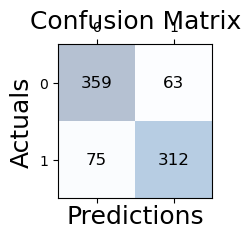

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
conf_matrix = confusion_matrix(test_label, predictions)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
import pickle
filename = 'xgb_amp_model.sav'
pickle.dump(exported_pipeline, open(filename, 'wb'))

In [1]:
test_df.head()

NameError: name 'test_df' is not defined